In [9]:
!pip install gym

In [5]:
!pip install JSAnimation
!pip uninstall pyglet -y
!pip install pyglet==1.2.4
!apt-get install -y ffmpeg

Uninstalling pyglet-1.2.4:
  Successfully uninstalled pyglet-1.2.4
  Using cached https://files.pythonhosted.org/packages/68/c3/300c6f92b21886b0fe42c13f3a39a06c6cb90c9fbb1b71da85fe59091a7d/pyglet-1.2.4-py3-none-any.whl
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dbus i965-va-driver libaacs0 libapparmor1 libasound2 libasound2-data libass9
  libasyncns0 libavc1394-0 libavcodec57 libavdevice57 libavfilter6
  libavformat57 libavresample3 libavutil55 libbdplus0 libbluray2
  libboost-filesystem1.62.0 libboost-system1.62.0 libbs2b0 libcaca0 libcairo2
  libcapnp-0.5.3 libcdio-cdda1 libcdio-paranoia1 libcdio13 libchromaprint1
  libcrystalhd3 libdbus-1-3 libdc1394-22 libdrm-amdgpu1 libdrm-common
  libdrm-intel1 libdrm-nouveau2 libdrm-radeon1 libdrm2 libegl1-mesa libelf1
  libfftw3-double3 libflac8 libflite1 libfribidi0 libgbm1 libgl1-mesa-dri
  libgl1-mesa-glx libglapi-mesa libgme0 libgraph

In [13]:
!apt-get install python-opengl

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  freeglut3 libglu1-mesa
Suggested packages:
  python-numpy libgle3
The following NEW packages will be installed:
  freeglut3 libglu1-mesa python-opengl
0 upgraded, 3 newly installed, 0 to remove and 0 not upgraded.
Need to get 738 kB of archives.
After this operation, 6,207 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/universe amd64 freeglut3 amd64 2.8.1-3 [73.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu artful/main amd64 libglu1-mesa amd64 9.0.0-2.1build1 [168 kB]
Get:3 http://archive.ubuntu.com/ubuntu artful/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Fetched 738 kB in 2s (310 kB/s)
Selecting previously unselected package freeglut3:amd64.
(Reading database ... 19905 files and directories currently installed.)
Preparing to unpack .../freeglut3_2.8.1-3_amd64.deb ...
Unpacking freeglut3

In [11]:
import gym
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from collections import deque

Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# 動画の描画関数の宣言
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

In [0]:
def display_frames_as_gif(frames, filename):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0),dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
 
    def animate(i):
        patch.set_data(frames[i])
 
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames),
                                   interval=50)
 
    anim.save(filename)  # 動画の保存
    display(display_animation(anim, default_mode='loop'))

In [14]:
# CartPoleをランダムに動かす
frames = []
env = gym.make('CartPole-v0')
env.reset()
for step in range(0, 200):
    frames.append(env.render(mode='rgb_array'))  # framesに各時刻の画像を追加していく
    action = np.random.choice(2)  # 0(カートを左に押す),1(カートを右に押す)をランダムに返す
    observation, reward, done, info = env.step(action)  # actionを実行する

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


NoSuchDisplayException: ignored

In [2]:
import gym
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from collections import deque

env = gym.make('CartPole-v0')

Using TensorFlow backend.


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [5]:
env.reset()

array([ 0.00170842,  0.03168946, -0.03679466,  0.00137285])

In [6]:
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample())

ReraisedException: ignored

In [0]:
class QNetwork:
    def __init__(self, learning_rate=0.01, state_size=4,
                 action_size=2, hidden_size=10):
        # state inputs to the Q-network
        self.model = Sequential()

        self.model.add(Dense(hidden_size, activation='relu',
                             input_dim=state_size))
        self.model.add(Dense(hidden_size, activation='relu'))
        self.model.add(Dense(action_size, activation='linear'))

        self.optimizer = Adam(lr=learning_rate)
        self.model.compile(loss='mse', optimizer=self.optimizer)

In [0]:
class Memory():
    def __init__(self, max_size=1000):
        self.buffer = deque(maxlen=max_size)

    def add(self, experience):
        self.buffer.append(experience)

    def sample(self, batch_size):
        idx = np.random.choice(np.arange(len(self.buffer)),
                               size=batch_size,
                               replace=False)
        return [self.buffer[ii] for ii in idx]

In [0]:
# ハイパーパラメーターの設定
train_episodes = 300          
max_steps = 200                
gamma = 0.99                   

# Exploration parameters
explore_start = 1.0            
explore_stop = 0.01            
decay_rate = 0.0001            

# Network parameters
hidden_size = 16               
learning_rate = 0.001         

# Memory parameters
memory_size = 10000            
batch_size = 32                
pretrain_length = batch_size

mainQN = QNetwork(hidden_size=hidden_size, learning_rate=learning_rate)

In [0]:
# エクスペリエンスメモリーへの貯蓄
env.reset()

state, reward, done, _ = env.step(env.action_space.sample())
state = np.reshape(state, [1, 4])

memory = Memory(max_size=memory_size)

for ii in range(pretrain_length):

    action = env.action_space.sample()
    next_state, reward, done, _ = env.step(action)
    next_state = np.reshape(next_state, [1, 4])

    if done:
        next_state = np.zeros(state.shape)
        memory.add((state, action, reward, next_state))

        env.reset()

        state, reward, done, _ = env.step(env.action_space.sample())
        state = np.reshape(state, [1, 4])
    else:
        memory.add((state, action, reward, next_state))
        state = next_state

In [11]:
# 学習
step = 0
rewards_list = []
for ep in range(1, train_episodes):
    total_reward = 0
    t = 0
    while t < max_steps:
        step += 1

        # 探索 or 活用
        explore_p = explore_stop + (explore_start - explore_stop)*np.exp(-decay_rate*step)
        if explore_p > np.random.rand():
            # 探索
            action = env.action_space.sample()
        else:
            # 活用
            Qs = mainQN.model.predict(state)[0]
            action = np.argmax(Qs)

        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, 4])
        total_reward += reward

        if done:
            next_state = np.zeros(state.shape)
            t = max_steps

            print('Episode: {}'.format(ep),
                  'Total reward: {}'.format(total_reward),
                  'Explore P: {:.4f}'.format(explore_p))
            rewards_list.append((ep, total_reward))
            
            memory.add((state, action, reward, next_state))

            # エピソード開始
            env.reset()
            # 1ステップ更新
            state, reward, done, _ = env.step(env.action_space.sample())
            state = np.reshape(state, [1, 4])
        else:
            # メモリーの追加
            memory.add((state, action, reward, next_state))
            state = next_state
            t += 1

        # リプレイ
        inputs = np.zeros((batch_size, 4))
        targets = np.zeros((batch_size, 2))

        minibatch = memory.sample(batch_size)
        for i, (state_b, action_b, reward_b, next_state_b) in enumerate(minibatch):
            inputs[i:i+1] = state_b
            target = reward_b
            if not (next_state_b == np.zeros(state_b.shape)).all(axis=1):
                target_Q = mainQN.model.predict(next_state_b)[0]
                target = reward_b + gamma * np.amax(mainQN.model.predict(next_state_b)[0])
            targets[i] = mainQN.model.predict(state_b)
            targets[i][action_b] = target
        mainQN.model.fit(inputs, targets, epochs=1, verbose=0)

ValueError: ignored

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
  cumsum = np.cumsum(np.insert(x, 0, 0))
  return (cumsum[N:] - cumsum[:-N]) / N

Text(0,0.5,'Total Rewards')

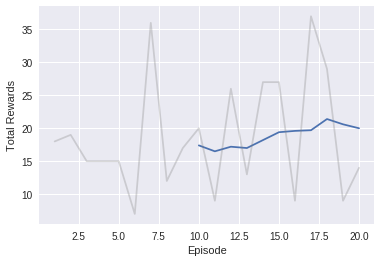

In [24]:
eps, rews = np.array(rewards_list).T
smoothed_rews = running_mean(rews, 10)
plt.plot(eps[-len(smoothed_rews):], smoothed_rews)
plt.plot(eps, rews, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total Rewards')